In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:

import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding3D , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Input


In [5]:
batch_size = 16
img_height = 200
img_width = 200 
NUM_CLASSES = 6

In [6]:
import pathlib
data_dir = r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\Data_aug"
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

280


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.7,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 8316 files belonging to 6 classes.
Using 2495 files for training.
Found 8316 files belonging to 6 classes.
Using 2494 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Bungarus', 'Calloselasma', 'Daboia_russelii', 'Naja', 'Ophiophagus', 'Trimeresurus']


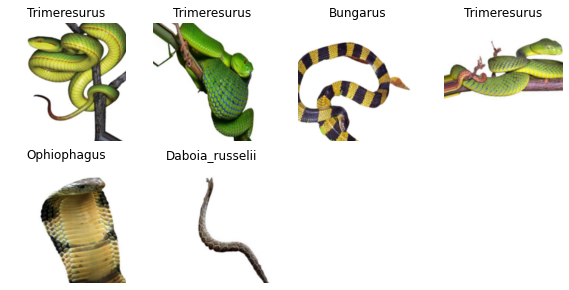

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    


In [11]:
model = Sequential()


model_name = "ResNet50"

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(img_height,img_width,3),
                    pooling='avg',classes=NUM_CLASSES,
                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


model.add(pretrained_model)

In [12]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
from tensorflow.keras.optimizers import Adam

learningRate = 0.00001
loss_function = "categorical_crossentropy"
model.compile(optimizer=Adam(learning_rate=learningRate),
               loss=loss_function,
               metrics=['accuracy'])

################################################
nb_epochs=100
################################################


In [15]:
# #  Train  with backup h5 every epoch. #####################


# checkpoint_path = r"./ModelSaving/{epoch:04d}.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, verbose=1, save_weights_only=False,
#     # Save weights, every epoch.
#     save_freq='epoch'
# )
# resnet_model.save(checkpoint_path.format(epoch=0))
# vg = validation_generator
# history = resnet_model.fit( train_generator, validation_data=vg ,epochs=nb_epochs, callbacks = [cp_callback])

In [16]:
vg = validation_generator
history = model.fit( train_generator, validation_data=vg ,epochs=nb_epochs )

NameError: name 'validation_generator' is not defined

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

print("Model = "+model_name)
print("Epochs = {}".format(nb_epochs))
print("Image Size = {}".format(img_width))
print("Batch = {}".format(batch_size))
print("learningRate = {}".format(learningRate))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#####  use this  to save train graph as png #####################
from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d-%m-%Y_%H-%M")
graph_path = r'./experimentData/graph'
if( not (os.path.exists(graph_path)) ) :
    os.mkdir(graph_path)
plt.savefig(graph_path+'/'+str_date_time+".png")  
#####  use this  to save train graph as png #####################

plt.show()





In [ ]:
model.save(r"./ModelSaving/FinalModel_"+modelName+".h5")

In [ ]:
import pandas as pd
import os

from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d/%m/%Y, %H:%M")



############################# List that var should be defined   
############################# รายชื่อตัวแปร ที่ควรสร้าง และใส่ค่า 
varList = {"model_name",   ### name of model
           "nb_epochs",     ### number of epochs
           "batch_size",    ###  batch size
           "learningRate",  ### learning rate
           "accuracy",       ###  accuracy of model
           "val_accuracy",  ### val_accuracy  of model
           "loss",          ### loss  of model
           "val_loss",      ### val_loss  of model
           "loss_function", ### lossfunction name    Must be str
           "graph_path",    ###  path to graph dir
           "exp_dataset",  ###  explain about dataset
           "other_comment"}  ###  option  for comment
#############################





pathDir = r'./experimentData'
path = r'./experimentData/Experiment.csv'

ExpDict = {
            'Date': [],
            'ModelName': [],
            'Epochs' : [],
            'ImageSize' : [],
            'Batch': [],
            'LearningRate' : [],
            'Accuracy' : [],
            'valAccuracy': [],
            'loss' : [],
            'valLoss' : [],
            'lossFunction' : [],
            'GraphPath' : [],
            'ExpDataSet' : [],
            'otherComment' : []
             }

if(not (os.path.exists(path))) :
    dt = pd.DataFrame(ExpDict)
    if( not (os.path.exists(pathDir)) ) :
            os.mkdir(pathDir)
    dt.to_csv(path,na_rep='',float_format='%.2f',index=False)

expExel = pd.read_csv(path)

for var in varList :
    if not(var in globals()):
        exec(var + " = ''")

        
ExpDict["Date"] = str_date_time
ExpDict["ModelName"] = model_name
ExpDict["Epochs"] = str(nb_epochs)
if ("img_height" in globals()) and  (img_width in globals()):
    ExpDict["ImageSize"] = str("HeightWidth = {}*{}".format(img_height,img_width))
elif ("img_size" in globals()):
    ExpDict["ImageSize"] = str("ImageSize = {}".format(img_size))
else :
    ExpDict["ImageSize"] = ""
ExpDict["Batch"] = str(batch_size)
ExpDict["LearningRate"] = str(learningRate)
ExpDict["Accuracy"] = str(accuracy)
ExpDict["valAccuracy"] = str(val_accuracy)
ExpDict["loss"] = str(loss)
ExpDict["valLoss"] = str(val_loss)
ExpDict["lossFunction"] = loss_function
ExpDict["GraphPath"] = graph_path
ExpDict["ExpDataSet"] = exp_dataset
ExpDict["otherComment"] = other_comment





In [ ]:
###  บันทึกทับลง exel
expExel = expExel.append(ExpDict,ignore_index=True)
expExel.to_csv(path,na_rep='',float_format='%.2f',index=False)